In [ ]:
import sys
input=sys.stdin.readline

NONE = 777777
T = int(input())

def bfs(G, vis, s):
  Q = [s]

  cnt = 1 #깊이
  while Q:
    nextQ = []
    while Q:
      v = Q.pop()
      vis[v] = cnt
      for i in G[v]: 
        if vis[i] == cnt: 
          return False #직전 노드의 간선끼리 연결되어있는 경우 => 삼각형
        if vis[i] != NONE: continue
        
        nextQ += [i]
    Q = nextQ
    cnt += 1

  return True

def sol() :
  V, E = map(int, input().split())
  G = [[] for _ in range(V + 1)]
  for _ in range(E) :
    u, v = map(int, input().split())
    G[u].append(v)
    G[v].append(u)

  vis = [NONE] * (V + 1)
  for i, l in enumerate(G[1:],1) :
    if not l or vis[i] != NONE : continue
    if not bfs(G, vis, i): 
      return False
  return True

for _ in range(T) :
  print("YES" if sol() else "NO")

# 이분 그래프의 증명
- In a bipartite graph, vertices are divided into two sets. Let's call them set U and set V. By definition, edges only exist between vertices in set U and set V. This means when you start from a vertex in set U, move to a vertex in set V (one step), and then move to another vertex in set U (second step), you've made an even length walk.

- To form a cycle, you must return to the original vertex. Since you can only move between vertices of different sets, and each such move increments your walk length by one, the only way to return to your starting vertex is to make an even number of moves. If you made an odd number of moves, you would end up in the other set.

- 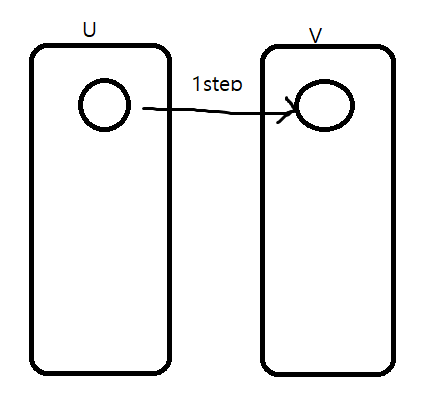
  - 사이클을 만들기 위해선 짝수 번의 step을 진행해야한다.

- 따라서 이분그래프의 모든 사이클은 짝수길이의 사이클을 가져야 한다.
- https://seungkwan.tistory.com/4
  - closed walk를 이용한 증명